Exploring Weather Trends - Project

SQL queries I have used to extract the data:

SELECT * FROM city_list;
SELECT * FROM global_data;
SELECT * FROM city_data


I've used Python/Pandas to solve that task.

In [1]:
import pandas as pd
import numpy as np
cities = pd.read_csv('./worldTemp/city.csv')
worldTemp = pd.read_csv('./worldTemp/worldavgtemp.csv')
avgTemp = pd.read_csv('./worldTemp/avgtemp.csv')
import matplotlib as plt
%matplotlib inline

In [2]:
cityTemp = cities.merge(right=avgTemp)

In [3]:
WarsawTemp = cityTemp.loc[lambda cityTemp: cityTemp['city'] == 'Warsaw']

In [4]:
WarsawTemp.set_index(['country','city','year'],inplace=True)

In [5]:
WARtoWORLD = WarsawTemp.merge(worldTemp,on='year',how='outer',suffixes=('_Warsaw', '_World')).set_index('year').interpolate().dropna()

In [6]:
WARtoWORLD = WARtoWORLD.expanding(10).mean()

<AxesSubplot:title={'center':'10-years moving average temperature comparison, Global Warsow'}, xlabel='year', ylabel='temperature in °C'>

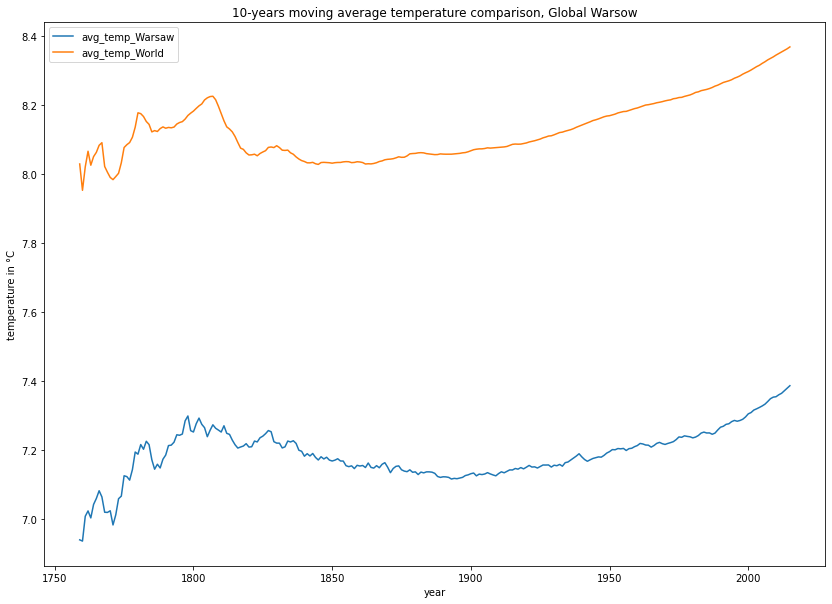

In [15]:
WARtoWORLD.plot(figsize=(14,10),ylabel='temperature in °C',title="10-years moving average temperature comparison, Global Warsow")

My City Warsaw is cooler on average compared to the global average, and the difference been consistent over time around 1 degree.

The changes of temperature in Warsaw fits the trend of global temperature on average.

The overall trend look like both average temperatures in Warsaw and globally is rising for last 120 years.

Both in Warsaw and globally, We are on a peck of average temperature right now.